# Prova IA : Questão 2  


## Thales Monteiro Soares  

#### Base disponivel em: https://archive.ics.uci.edu/ml/machine-learning-databases/00492/

# <center> Análise do volume de tráfego

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

### Visualização da base de dados

In [364]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Pré processamento dos dados

## Verificando dados duplicados

#### Foi verificado que há 17 instancias duplicadas no nosso dataframe.

In [79]:
print('Valores duplicados:', df.duplicated().value_counts())

Valores duplicados: False    48187
True        17
dtype: int64


#### Excluindo as  linhas duplicadas

In [80]:
df.drop_duplicates(subset=None, keep= 'first', inplace=True)

## Verificando dados NULL

#### Não há nenhum dado null no dataframe

In [81]:
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64


## Visualizando as colunas que possuem texto como informação

#### Foi observado que as colunas: holiday, weather_main e weather_description possuiam texto como informação. Precisaremos utilizar a técnica de label encoder para transformar essas informações de texto para númericas.
  

#### A coluna Weather_description possui 38 descrições do clima, porém a descrição "sky is clear" aparece novamente no dataset como "Sky is Clear". Como ambas tratam da mesma descrição precisamos juntá-las.

In [82]:
# Renomeando as instancias com "Sky is Clear" para "sky is clear".
df.replace(to_replace ="Sky is Clear", 
           value ="sky is clear", inplace = True)

## Verificando Outlier na base

### Outlier observado na na coluna rain_1h

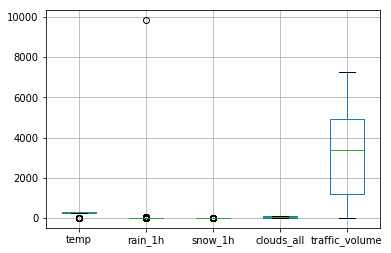

In [83]:
df.boxplot()

In [84]:
# Verificado outlier na linha 24872 
df['rain_1h'].nlargest(2)

24872    9831.30
8247       55.63
Name: rain_1h, dtype: float64

#### Excluindo instância do outlier

In [85]:
df = df.drop(24872, axis = 0)

### Verificando outlier na coluna temp

### Verificou-se que há 10 outliers no valor de 0

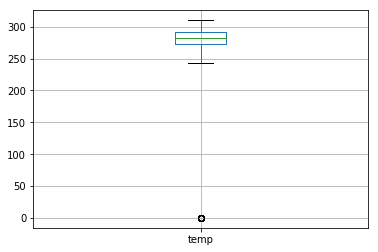

In [86]:
pd.DataFrame(df['temp']).boxplot()

In [87]:
# Verificando o indice dos outlier
df['temp'].nsmallest(11)

11898      0.00
11899      0.00
11900      0.00
11901      0.00
11946      0.00
11947      0.00
11948      0.00
11949      0.00
11950      0.00
11951      0.00
29252    243.39
Name: temp, dtype: float64

#### Excluindo outliers do dataframe

In [88]:
df = df.drop([11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950, 11951], axis = 0)

## Realizando Label Enconder 

#### Label encoder na coluna Holiday

In [89]:
from sklearn.preprocessing import LabelEncoder

holiday = LabelEncoder().fit_transform(df['holiday'])
df['holiday'] = holiday

#### Label encoder na coluna weather_main

In [90]:
weather = LabelEncoder().fit_transform(df['weather_main'])
df['weather_main'] = weather

#### Label encoder na coluna weather_description

In [91]:
weather_desc = LabelEncoder().fit_transform(df['weather_description'])
df['weather_description'] = weather_desc

#### Verificando a base após label encoder

In [92]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,7,288.28,0.0,0.0,40,1,23,2012-10-02 09:00:00,5545
1,7,289.36,0.0,0.0,75,1,1,2012-10-02 10:00:00,4516
2,7,289.58,0.0,0.0,90,1,18,2012-10-02 11:00:00,4767
3,7,290.13,0.0,0.0,90,1,18,2012-10-02 12:00:00,5026
4,7,291.14,0.0,0.0,75,1,1,2012-10-02 13:00:00,4918


## Rearranjando os dados da coluna date_time

#### A base possui uma coluna chamada date_time que guarda a data e a hora da aferição do volume de trafego. Essa coluna é importante para a obtenção do volume de tráfego.

#### Precisamos transformar o campo date_time em dois campos, um com as horas e o outro com o dia da semana.

In [93]:
traffic = df.pop('traffic_volume')

df['date_time'] = pd.to_datetime(df['date_time'], errors = 'raise')
df['day_of_week'] = pd.to_datetime(df['date_time'], errors = 'raise').dt.dayofweek
df['hour'] = pd.to_datetime(df['date_time'], errors = 'raise').dt.hour
df['traffic_volume'] = traffic

#### Removendo a coluna date_time, pois já temos a informação necessária nas colunas hour e day_of_week

In [94]:
df.drop('date_time', axis = 1, inplace = True)

#### Na Matriz de correlação a seguir é possivel observar que as maiores correlações com o traffic_volume é das colunas hour e day_of_week.

In [95]:
corr = df.corr()
corr.style.background_gradient("coolwarm")

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day_of_week,hour,traffic_volume
holiday,1,-0.000424055,-0.000289248,0.000431971,0.00707888,-0.00431427,-0.00823901,0.0214549,0.0260487,0.0186826
temp,-0.000424055,1,0.089943,-0.0208605,-0.112881,-0.0393927,0.0326282,-0.00309074,0.113423,0.132115
rain_1h,-0.000289248,0.089943,1,0.00152254,0.0814898,0.175859,0.00403455,-0.00636912,-0.0113699,-0.022372
snow_1h,0.000431971,-0.0208605,0.00152254,1,0.027932,0.036641,0.00236941,-0.0149258,0.00984861,0.00073152
clouds_all,0.00707888,-0.112881,0.0814898,0.027932,1,0.500698,-0.490397,-0.0395194,0.054287,0.0668887
weather_main,-0.00431427,-0.0393927,0.175859,0.036641,0.500698,1,-0.23185,-0.0384911,-0.0538052,-0.0403769
weather_description,-0.00823901,0.0326282,0.00403455,0.00236941,-0.490397,-0.23185,1,0.0278993,-0.0153519,-0.0610156
day_of_week,0.0214549,-0.00309074,-0.00636912,-0.0149258,-0.0395194,-0.0384911,0.0278993,1,-0.00358344,-0.149306
hour,0.0260487,0.113423,-0.0113699,0.00984861,0.054287,-0.0538052,-0.0153519,-0.00358344,1,0.352177
traffic_volume,0.0186826,0.132115,-0.022372,0.00073152,0.0668887,-0.0403769,-0.0610156,-0.149306,0.352177,1


## Normalizando os dados de entrada

In [96]:
# Função utilizada para a normalização
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [100]:
df.iloc[:, :9] = normalize(df.iloc[:, :9])
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day_of_week,hour,traffic_volume
0,0.636364,0.673215,0.0,0.0,0.40,0.1,0.638889,0.166667,0.391304,5545
1,0.636364,0.689412,0.0,0.0,0.75,0.1,0.027778,0.166667,0.434783,4516
2,0.636364,0.692711,0.0,0.0,0.90,0.1,0.500000,0.166667,0.478261,4767
3,0.636364,0.700960,0.0,0.0,0.90,0.1,0.500000,0.166667,0.521739,5026
4,0.636364,0.716107,0.0,0.0,0.75,0.1,0.027778,0.166667,0.565217,4918


# Split Data em entrada e saida

In [342]:
x = df.iloc[:, :9]
y = df.iloc[:,9:]

### Split realizado na proporção de 30% teste e 70% treinamento

In [343]:
from sklearn.model_selection import train_test_split
#Separando em dados de treino(entrada e saida) e dados de teste(entrada e saida)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state = 12)

### Observando o conjunto de treino e de teste

### X_train

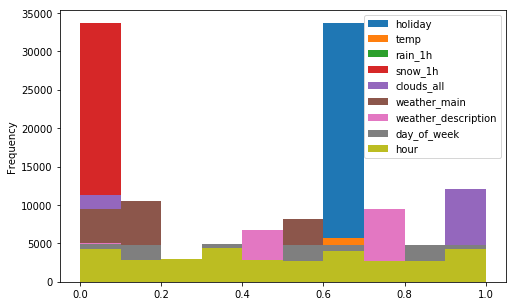

In [344]:
x_train.plot(kind='hist', figsize=(8,5))

### X_test

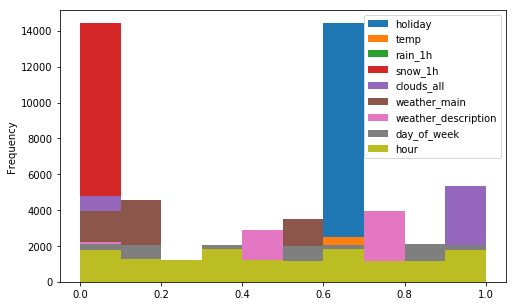

In [345]:
x_test.plot(kind='hist', figsize=(8,5))

### Y_train

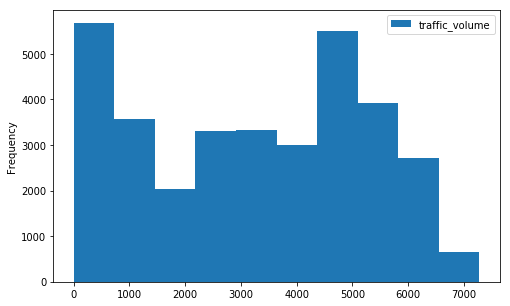

In [346]:
y_train.plot(kind='hist', figsize=(8,5))

### Y_test

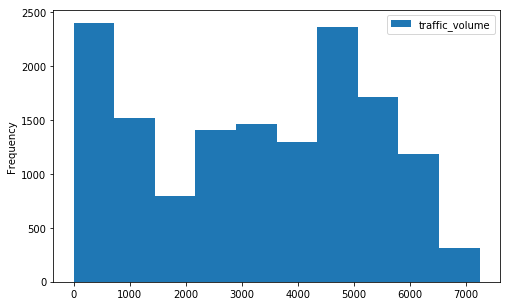

In [347]:
y_test.plot(kind='hist', figsize=(8,5))

# KNeighborsRegressor

#### Utilizaremos o KNN Regressor para realizar a regressão do valor do volume de tráfego.
#### Inicialmente testaremos valores de K entre 1 e 21 para verificar o valor do RMSE

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(x_train, y_train)  #fit the model
    y_pred=knn.predict(x_test) #make prediction on test set

    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 788.3438747780189
RMSE value for k=  2 is: 670.1431161051355
RMSE value for k=  3 is: 635.5529413300434
RMSE value for k=  4 is: 622.4959160107635
RMSE value for k=  5 is: 614.8962830777074
RMSE value for k=  6 is: 613.4664601716707
RMSE value for k=  7 is: 611.9016772044689
RMSE value for k=  8 is: 616.584238502505
RMSE value for k=  9 is: 620.3478376990046
RMSE value for k=  10 is: 626.0854369805184
RMSE value for k=  11 is: 629.3786289659519
RMSE value for k=  12 is: 634.4004021120719
RMSE value for k=  13 is: 637.193934512899
RMSE value for k=  14 is: 642.0198228408416
RMSE value for k=  15 is: 646.876920957583
RMSE value for k=  16 is: 651.8986107528549
RMSE value for k=  17 is: 656.1510299277758
RMSE value for k=  18 is: 661.0687206152996
RMSE value for k=  19 is: 666.1148160317285
RMSE value for k=  20 is: 671.4332192238163


### No gráfico abaixo é possivel observar que o menor valor do Erro RMSE ocorre no valor de K = 7 no valor de 611.9

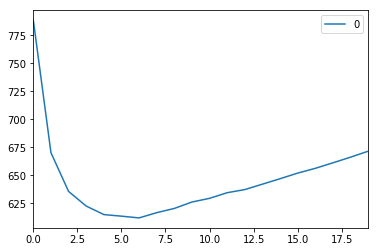

In [249]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

### TESTE 1 : Realizando o KNN com K = 7 e split aleatório 

In [348]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state = 30)

In [349]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test) 

### Root Mean Squared Error (RMSE)
####  A primeira métrica utilizada para verificar o desempenho do nosso modelo regressor será o RMSE. O RMSE nada mais é do diferença entre o valor que foi previsto pelo modelo e o valor real observado.

In [350]:
# Valor do RMSE do nosso modelo
sqrt(mean_squared_error(y_test,y_pred))

622.5269861085671

### R2 Score

#### O R2 Score é uma medida estatística que diz o quão próximo os dados estão da linha de regressão ajustada. O valor varia entre 0 e 1 e quanto mais perto de 1 melhor é o modelo

In [351]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred).round(4)

0.902

### Gráfico que apresenta o resultado da regressão para 20 amostras.

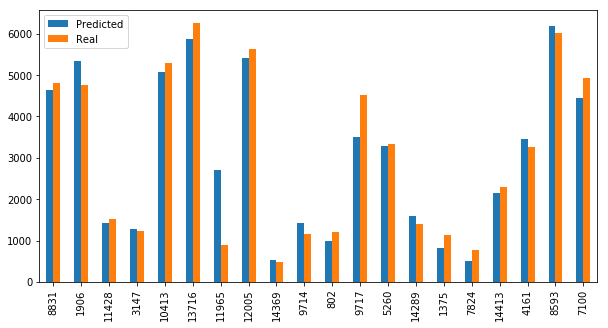

In [352]:
plotSaida = pd.DataFrame({'Real': np.array(y_test).flatten(), 'Predicted': np.array(y_pred).flatten()})
plotSaida = plotSaida.sample(20)
plotSaida.plot.bar(figsize=(10,5))

### TESTE 2 : Realizando o KNN com K = 7 e split aleatório 

In [353]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state = 130)

In [360]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test) 

In [355]:
# Valor do RMSE do nosso modelo
sqrt(mean_squared_error(y_test,y_pred))

623.1842957288752

In [356]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred).round(4)

0.9021

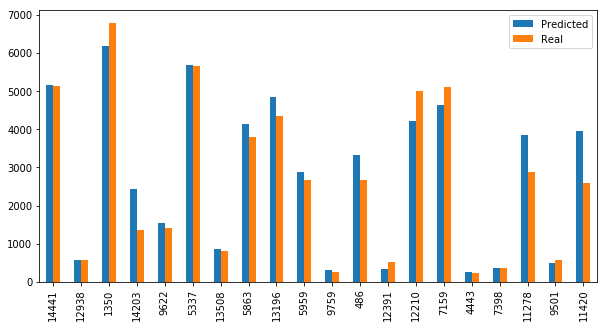

In [357]:
plotSaida = pd.DataFrame({'Real': np.array(y_test).flatten(), 'Predicted': np.array(y_pred).flatten()})
plotSaida = plotSaida.sample(20)
plotSaida.plot.bar(figsize=(10,5))

### O split aleatorio não impactou tanto a saida do nosso modelo regressor. O valor do RMSE e do R2Score ficaram próximos nas duas repetições.

# Validação Cruzada com o KNN

### A Validação Cruzada mostra como o modelo generaliza, ou seja, como ele se comporta quando vai prever um dado que nunca viu.

### Executando validação cruzada com cv = 10

In [358]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors = 7)
scores = cross_val_score(knn, x, y, cv=10)
scores

array([0.87201289, 0.91258416, 0.85872156, 0.91178619, 0.89856332,
       0.85361731, 0.91243456, 0.91608969, 0.86860602, 0.90939701])

In [314]:
print("Acurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Acurácia: 0.89 (+/- 0.05)


### A validação cruzada(CV) mostra que nosso modelo é capaz de obter 89% de acuracia na previsão de dados que nunca foram apresentados para o modelo.  O lado positivo do CV em relação ao split  é que ele proporciona um melhor treinamento do modelo e pode evitar overfitting.